#Goal: Classify data from the CIFAR-10 dataset
Approach: Training an image classifier using a Convolution Neural Network (CNN)

Steps:
1.   Import necessary libraries
2.   Load CIFAR-10 datasets
3.   Define Data Transformations
4.   Create Data Loaders
5.   Define the CNN Architecture
6.   Instantiate the Model
7.   Define Loss Function and Optimizer
8.   Train the Model
9.   Evaluate the Model
10.  Adjust Hyperparameters



#Step 1: Import necessary libraries
We will use torch and torchvision libraries which are widely used for deep learning and computer vision tasks, respectively.

###PyTorch:
'torch', a core deep learning library in PyTorch provides tensor computations which makes it easy to define and train neural networks.
It provides automatic differentiation functionality through its 'autograd' module, which computes gradients of tensors with respect to a given loss function. This simplifies the process of implementing backpropagation for training neural networks.

###Torchvision
It is a part of the PyTorch ecosystem providing collection of utilities, datasets, models and transformations specifically designed for computer vision tasks.
It provides easy access to popular datasets for computer vision tasks, such as CIFAR-10, MNIST, and ImageNet, along with data loaders to efficiently load and process the data.
It offers a wide rnage of image transformation functions for data augmentation, preprocessing, and normalization. These transformations when applied to images, enhance model robustness and generalization.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# Step 2: Load CIFAR-10 datasets

# Step 3: Define Transformations

# Step 4: Create Data Loaders
The output of torchvision are PILImages of range[0,1], so we transform them to Tensors of normalized range [-1,1].

_Learning Tip: This process make the data more suitable for training machine learning models._

In [ ]:
#normalization trasformation: Mean(0.5, 0.5, 0.5) and standard deviation (0.5, 0.5, 0.5)
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#use inbuilt dataset CIFAR-10
#The same transformation applied to both Training and Test datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

#The 10 classes from the CIFAR-10 database
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Display some images from the dataset.
Remember we need to unnormalize the images back to bring the pixel values back to original.


 ship  frog truck horse


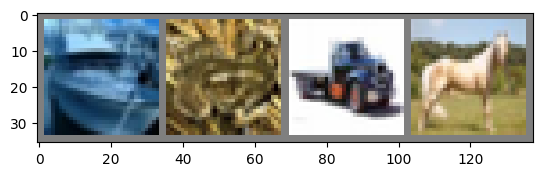

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#function to show image
def image_show(img):
  img = img/2 + 0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

#get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.__next__()

#show images
image_show(torchvision.utils.make_grid(images))

#print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Step 5: Define the CNN Architecture


Our CNN architecture will consist of alternative convolutional and pooling layers for feature extraction, followed by fully connected layers for classification, with ReLU activation functions applied after each layer to introduce non-linearity.

Below we describe in detail the operations performed by each layer on the input data.

1.   Convolutional Layers (**```nn.Conv2d```**)
*   **`self.conv1`**: This is the first convolutional layer. It takes an input with 3 channels (representing the 3 RGB channels of the image) and applies 6 filters of size 5x5. The output of this layer will have 6 channels.
*   **`self.conv2`**: This is the second convolutional layer. It takes the output of the first convolutional layer (which has 6 channels) and applies 16 filters of size 5x5. The output of this layer will have 16 channels.

2.   Pooling Layers (**```nn.MaxPool2d```**)
*    **`self.pool`**: This is the max pooling layer. It's job is to downsample feature maps and reduce spatial dimensions (width and height) of the input by taking the maximum value within each window. In this case, it applies a 2x2 max pooling operation with a stride of 2, effectively halving the size of the input along both dimensions.

3.   Fully Connected Layers (**``nn.Liner``**):
*   **`self.fc1`**: This is the first fully connected (or dense) layer. It takes the output of the last convolutional layer after flattening it into a vector (with 1655 dimensions) and applies a linear transformation to produce a vector of size 120.
*   **`self.fc2`**: This is the second fully connected layer. It takes the output of the previous layer (which has 120 dimensions) and applies another linear transformation to produce a vector of size 84.
*   **`self.fc3`**: This is the final fully connected layer. It takes the output of the previous convolutional layer (which has 84 dimensions) and applies another linear transformation to produce the final output vector of size 10, corresponding to the 10 classes in the CIFAR-10 dataset.

4.   Activation Functions (**`F.relu`**)
*    ReLU (Rectified Linear Unit) is used as the activation function after each convolutional and fully connected layer except for the final output layer. ReLU introduces non-linearity into the network by replacing the negative pixel values with 0, helping the model learn complex patterns in the data.


5. Flattening Operation (**`x.view`**)
*   Before passing the output of the last convolution layer to the fully connected layers, a flattening operation is applied to convert the 3D tensor into a 1D vector. This is necessary because fully connected layers expect their input to be one-dimensional.




### Forward Pass

The Forward pass function serves as the blueprint for the CNN architecture, defining how input data traverses through the network and undergoes transformation at each layer. It encapsulates the connectivity, operations, and activations that characterize the architecture's behavior during the forward pass.

The **`forward`** function defines the sequence of operations or the order that the input data goes through as it passes through the layers of the neural network during the forward pass. This function is passed automatically when input data is passed to the network, and it computes the output of the network based on the current parameters and input data.

In [ ]:
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    #Define the layers:
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10) #to match the 10 classes in CIFAR-10

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


# Step 6: Instantiate the Model

The custom CNN Model architecture, defined using `Net` class is instantiated next. This class inherits from **`nn.Module`** which is the base class for all neural network modules in PyTorch.

The instance created after instantiating the Net class, namely, **`net`** represents a specific neural network model with its own set of parameters (weights and biases) and architecture defiend by the **`forward`** function.

During the initialization, the constructor (**`__init__`** method) of the **`Net`** class is called to initialize the model.

In [ ]:
net = Net()

# Step 7: Define a Loss function and Optimizer

Before we can proceed with training the neural network model, we need a loss function and optimizer.
We shall use a Classification Cross-Entropy Loss and Stochastic Gradient Descent (SGD) with momentum as the optimizer. The Cross Entropy Loss is used to compute the loss between the model's predictions and the ground truth labels, while SGD is used to update the model parameters based on the computed gradients of the loss function.

Let's understand them in more details:
1.    Defining the Loss Function:
*     We use **`torch.nn`** module's CrossEntropyLoss class. This loss function is commonly used for multi-class classification problems like the one we have with CIFAR-10. The Cross-Entropy Loss computes the softmax activation internally, so the output of the model should be raw digits rather than softmax probabilities.

2.    Defining the Optimizer:
*    We create an instance of the stochastic gradient descent (SGD) optimizer from the **`torch.optim`** module. SGD is a commonly used optimization algorithm for training neural networks


In [ ]:
#The loss function
criterion = nn.CrossEntropyLoss()

#net.parameters: the parameters of the model are provided to the Optimizer so that it can update them during the training to minimize the loss

# lr specifies the learning rate, which is the size of the step the optimizer takes during parameter updates.
#     A smaller learning rate generally leads to slower but more precise convergence.

#momentum, as the name suggests, adds momentum to the gradient descent update. It helps accelerate convergence by dampening oscillations and making updates
#     more consistent in direction. A typical value is between 0.9 and 0.99
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#Step 8:
Training the Model

Broadly, we follow the following steps:

* We iterate multiple times over the dataset, each pass through the dataset is referred to as an epoch.

* We keep track of the cumulative loss over mini-batches within an epoch, initialized to 0 at the beginning of each epoch.

* We have a loop to go through mini-batches of data from the training dataset. Iterating over trainloader provides a mini-batch (of size 4, which was used in creating the trainloader at the beginning of this project). **`data`** contains the input-output pairs, while **`i`** is the index of the current mini-batch.

* We unpack the input data and the corresponding labels from the current mini-batch.

* Clearing the gradients of all optimized parameters: the gradients must be cleared before each mini-batch to avoid accumulation from previous mini-batches.

* **`outputs = net(inputs)`** is the forward pass of the neural network model. Passing the input data through the neural network model, it provides the predicted outputs. The forward pass computes the output _`logits`_ for each input example.

* Computing loss: The loss is calculated between the predicted outpt and the actual label using the CrossEntropy loss function, **`criterion`**.

* Backpropagation: **`loss.backward()`** computes the gradients of the loss with respect to the model parameters, enabling backpropagation. Gradients are calculated for all parameters that have **`requires_grad=True`**.

* Updating parameters: **`optimizer.step()`** updates the model parameters based on the computed gradients and the optimization algorithm (SGD in this case). This step adjusts the parameters to minimze the loss.




In [ ]:
for epoch in range(2): #loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    #get the inputs; data is a list of [inputs, labels]
    inputs, labels = data

    #zero the parameter gradients
    optimizer.zero_grad()

    #forward + backward + optimize (update of params)
    outputs = net(inputs) #predit output
    loss = criterion(outputs, labels) #computing loss between predicted output and actual labels
    loss.backward() #backpropagation
    optimizer.step() #updating the parameters

    #print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: #print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i+1, running_loss/2000))
      running_loss = 0.0
print('Finished Training')



[1,  2000] loss: 1.201
[1,  4000] loss: 1.184
[1,  6000] loss: 1.171
[1,  8000] loss: 1.175
[1, 10000] loss: 1.157
[1, 12000] loss: 1.127
[2,  2000] loss: 1.089
[2,  4000] loss: 1.092
[2,  6000] loss: 1.058
[2,  8000] loss: 1.070
[2, 10000] loss: 1.068
[2, 12000] loss: 1.085
Finished Training


#Step 9: Evaluate the Model

Next, we evaluate the trained model on the test dataset to assess its performance. We shall make use of metrices such as accuracy, precision, recall and F1-score.

We pass the input images from the test dataset through the trained neural network model(**`net`**) to obtain the predicted outputs. The outputs are raw logits for each class.

**`torch.max(outputs.data, 1`** computes the maximum value along the second dimension of the output tensor, which corresponds to the predicted class indices. This function also returns the maximum value, but as we are not interested in it, we discard by using `_`. We only need the indices, which we store in **`predicted`**.

_A note on the **``torch.nograd``**:_

_This is a context manager provided by PyTorch. Inside this block, the gradient calculation is disabled. This is useful during inference because we don't need to compute gradients for the test data, and it saves memory and computation time._


In [ ]:
correct = 0   # counter to keep track of the correcly predicted labels
total = 0     #initialize the counter to keep track of the total number of samples in the test dataset

with torch.no_grad():
  for data in testloader: #now its the time to use the test dataset
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0) #adds the number of labels in the current mini-batch to the total count. `labels.size(0)` gives the batch size.

    #calculates the number of correctly predicted labels in the current mini-batch and adds it to the correct count.
    #(predicted == labels) crates a tensor of boolean values indicating wheather each prediction is correct or not.
    correct += (predicted == labels).sum().item() #.sum().item() sums up the correct predictions and coverts the result to a Python scalar

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct/total))

Accuracy of the network on the 10000 test images: 61 %


The accuracy obtained is certainly quite low. But this is not the end of the world and definitely gives us a taste of what to expect when a new model is created to handle a task in the real-world.
In fact, this provides a great opportunity to learn and figure out various ways how the model could be further improved. It would also give us a chance to study **``hyperparameters``**.

Hyperparameters in neural networks are the parameters which are set before the learning process beings. Unlike model parameters which are learned during the training phase, hyperparameters are crucial to control the behavior of the training algorigthm and the structure of the neural network itself. The performance, efficiency, and complexity of a neural network can be significantly influenced by the choice of hyperparameters.

##Next steps:
1. Investigate how the accuracy of the model can be improved.
2. Have a look into hyperparameters.
3. Derive other performance metrices of the Neural Network model, such as precision, recall, f1-score etc.
